In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

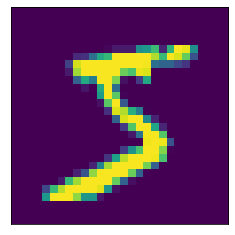

In [36]:
plt.imshow(train_images[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
train_images = train_images.astype('float32') / 255.0
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))

In [13]:
from tensorflow.keras.utils import to_categorical
test_labels = to_categorical(test_labels)
train_labels = to_categorical(train_labels)

In [15]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
np.argmax(test_labels[:5], axis=1)

array([7, 2, 1, 0, 4])

#  Instantiating a small convnet

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [37]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [45]:
import time
dir_name='my_logs/' + time.strftime('%Y_%M_%d_%m_%s')

In [51]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=dir_name)

In [55]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_split=0.1, callbacks=[tensorboard_cb])

Epoch 1/5
1688/1688 [==============================] - 60s 36ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 2/5
1688/1688 [==============================] - 45s 26ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/5
1688/1688 [==============================] - 43s 25ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 4/5
1688/1688 [==============================] - 41s 24ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3023 - val_accuracy: 0.1050
Epoch 5/5
1688/1688 [==============================] - 43s 26ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3022 - val_accuracy: 0.1050


In [56]:
%tensorboard --logdir=my_logs

Reusing TensorBoard on port 6007 (pid 53109), started 0:23:27 ago. (Use '!kill 53109' to kill it.)

In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 9ms/step - loss: 2.3011 - accuracy: 0.1135


0.11349999904632568

In [58]:
test_acc

0.11349999904632568

In [61]:
%load_ext yamlmagic

In [69]:
%%yaml yamlFromMagic
dataset:
  path: './AIandMachineLearning/horse-or-human'
  train_size: 0.8
  size_x: 224
  size_y: 224
  classes: 2
  channel: 3
  path_image: './dataset.png'
  predict_image: './prediction.png'
train:
  optimizer: NADAM       # Possible values: ADAM,NADAM,SGD,SGD_MOMENTUM,RMS_PROP,ADA_GRAD
  learning_rate: 0.001
  batch_size: 32
  use_multiprocessing: True
  num_workers: -1
  epochs: 1
  weight_initialization:
    use_pretrained: False
    restore_from: './last.h5'
  output_weight: './final.h5'
network:
  graph_path: './graph.json'
  model_img: './model.png'
data_aug:
  use_aug: False
callbacks:
  earlystopping:
    use_early_stop: True
    patience: 10
    monitor: 'val_loss'
  checkpoint:
    checkpoint_last:
      enabled: True
      monitor: 'val_loss'
      out_last: './last.h5'
    checkpoint_best:
      enabled: True
      monitor: 'val_loss'
      out_last: './best.h5'
  tensorboard:
    enabled: True
    log_dir: './logs'
  scheduler:
    onecycle:
      to_use : True
      max_rate: 0.05
    exponential_scheduler:
      to_use : False
      params: 10

<IPython.core.display.Javascript object>

In [70]:
print(yamlFromMagic)

{'dataset': {'path': './AIandMachineLearning/horse-or-human', 'train_size': 0.8, 'size_x': 224, 'size_y': 224, 'classes': 2, 'channel': 3, 'path_image': './dataset.png', 'predict_image': './prediction.png'}, 'train': {'optimizer': 'NADAM', 'learning_rate': 0.001, 'batch_size': 32, 'use_multiprocessing': True, 'num_workers': -1, 'epochs': 1, 'weight_initialization': {'use_pretrained': False, 'restore_from': './last.h5'}, 'output_weight': './final.h5'}, 'network': {'graph_path': './graph.json', 'model_img': './model.png'}, 'data_aug': {'use_aug': False}, 'callbacks': {'earlystopping': {'use_early_stop': True, 'patience': 10, 'monitor': 'val_loss'}, 'checkpoint': {'checkpoint_last': {'enabled': True, 'monitor': 'val_loss', 'out_last': './last.h5'}, 'checkpoint_best': {'enabled': True, 'monitor': 'val_loss', 'out_last': './best.h5'}}, 'tensorboard': {'enabled': True, 'log_dir': './logs'}, 'scheduler': {'onecycle': {'to_use': True, 'max_rate': 0.05}, 'exponential_scheduler': {'to_use': Fals

In [79]:
input_size = np.random.randn(3,28,28,1)
specification = {'filters':20, 'activation':'relu', 'kernel_size': 5}
out = tf.keras.layers.Conv2D(**specification)(input_size)

In [81]:
out.shape

TensorShape([3, 24, 24, 20])

In [88]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 118s 1us/step


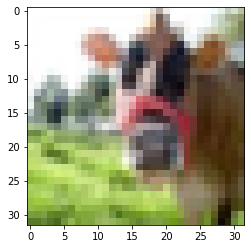

In [90]:
plt.imshow(train_images[0])

In [92]:
dir(tf.keras.datasets.cifar100)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [98]:
tf.keras.datasets.cifar100.__builtins__

{'__name__': 'builtins',
 '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
 '__package__': '',
 '__loader__': _frozen_importlib.BuiltinImporter,
 '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
 '__build_class__': <function __build_class__>,
 '__import__': <function __import__>,
 'abs': <function abs(x, /)>,
 'all': <function all(iterable, /)>,
 'any': <function any(iterable, /)>,
 'ascii': <function ascii(obj, /)>,
 'bin': <function bin(number, /)>,
 'breakpoint': <function breakpoint>,
 'callable': <function callable(obj, /)>,
 'chr': <function chr(i, /)>,
 'compile': <function compile(source, filename, mode, flags=0, dont_inherit=False, optimize=-1)>,
 'delattr': <function delattr(obj, name, /)>,
 'dir': <function dir>,
 'divmod': <function divmod(x, y, /)>,
 'eval': <function eval(source, globals=None, locals=None, /)>,
 'exec': <function exec(s